In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

C:\Users\eky6j6p\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
creditdf = pd.read_csv('Credit.csv', index_col=0)
creditdf = creditdf[creditdf.Limit > 3500]

In [7]:
creditdf.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Predict the balance on the card based on some factor.

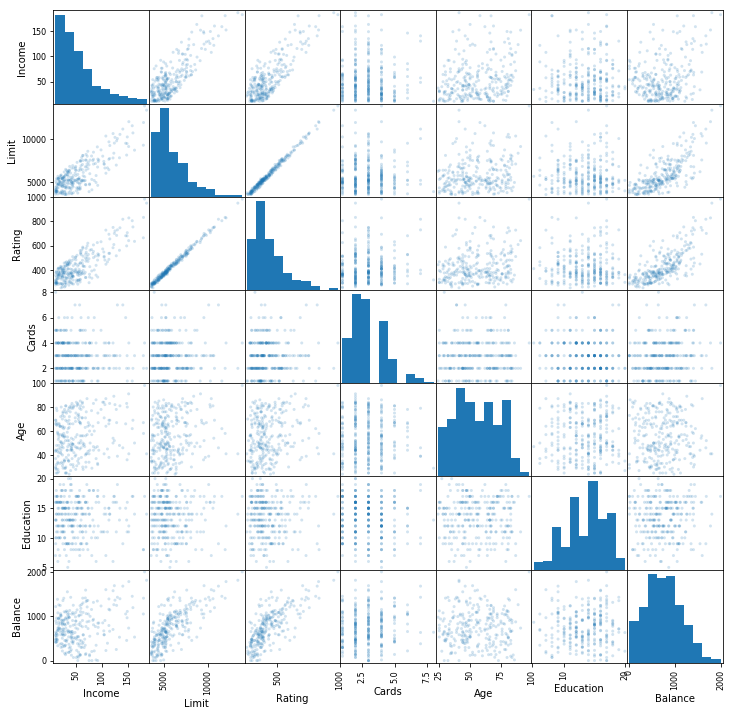

In [8]:
scatter_matrix(creditdf, alpha=0.2, figsize=(12,12))
None

In [71]:
y = creditdf.Balance
X = creditdf[['Limit', 'Rating', 'Income']]
#X = sm.add_constant(X)

In [72]:
model = sm.OLS(y, X).fit()

In [73]:
model.params

Limit     0.529348
Rating   -4.539868
Income   -6.995147
dtype: float64

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1321.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.31e-158
Time:                        13:30:33   Log-Likelihood:                -1807.6
No. Observations:                 267   AIC:                             3621.
Df Residuals:                     264   BIC:                             3632.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Limit          0.5293      0.063      8.345      0.000       0.404       0.654
Rating        -4.5399      0.844     -5.381      0.000      -6.201      -2.879
Income        -6.9951      0.534    -13.093      0.000      -8.047      -5.943
==============================================================================
Omnibus:                       44.092   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.097
Skew:                           1.075   Prob(JB):                     5.41e-14
Kurtosis:                       3.934   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
creditdf[creditdf.Balance > 10].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,263.0,54.791046,39.035899,10.403,25.7725,43.682,69.4535,186.634
Limit,263.0,5929.338403,1898.828173,3526.000,4670.5000,5380.000,6819.0000,13913.000
Rating,263.0,434.357414,128.382396,256.000,345.5000,397.000,492.5000,982.000
Cards,263.0,2.950570,1.406579,1.000,2.0000,3.000,4.0000,8.000
Age,263.0,55.806084,17.507153,24.000,42.5000,55.000,69.0000,98.000
Education,263.0,13.319392,3.227489,5.000,11.0000,14.000,16.0000,20.000
Balance,263.0,756.958175,387.775849,15.000,466.0000,724.000,1019.0000,1999.000


In [14]:
#credit2df = pd.get_dummies(creditdf,['Gender','Student','Married','Ethnicity'])
#creditfinal = credit2df.drop(['Married_No','Student_No','Gender_Female'], axis=1)


In [27]:
creditfinal = pd.read_csv('credit.csv', index_col=0)
creditfinal = creditfinal[creditfinal.Limit > 3500]
creditfinal['Student'] = creditfinal.Student.map({'No':0, 'Yes':1})
creditfinal['Married'] = creditfinal.Married.map({'No':0, 'Yes':1})
creditfinal['Ethnicity'] = creditfinal.Ethnicity.map({'Caucasian':0, 'Asian':1, 'African American':2})
creditfinal['Female'] = pd.get_dummies(creditfinal.Gender)['Female']
creditfinal.drop(['Gender'], axis=1, inplace=True)
creditfinal.head(3)

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Ethnicity,Balance,Female
1,14.891,3606,283,2,34,11,0,1,0,333,0
2,106.025,6645,483,3,82,15,1,1,1,903,1
3,104.593,7075,514,4,71,11,0,0,1,580,0


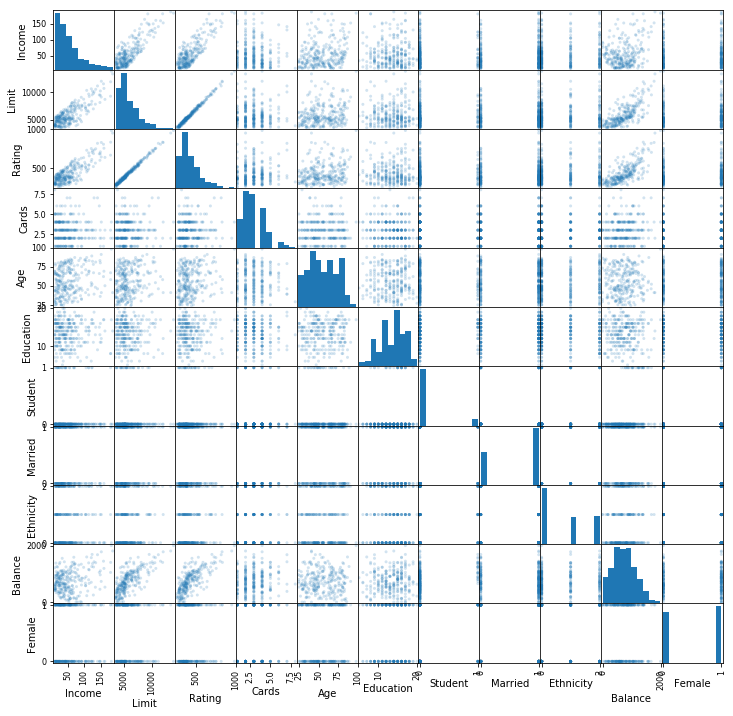

In [28]:
scatter_matrix(creditfinal, alpha=0.2, figsize=(12,12))
None

In [31]:
y = creditfinal.Balance
X = creditfinal[['Limit', 'Rating', 'Income', 'Student']]
X = sm.add_constant(X)

In [24]:
creditfinal[creditfinal.Balance > 10].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,263.0,54.791046,39.035899,10.403,25.7725,43.682,69.4535,186.634
Limit,263.0,5929.338403,1898.828173,3526.000,4670.5000,5380.000,6819.0000,13913.000
Rating,263.0,434.357414,128.382396,256.000,345.5000,397.000,492.5000,982.000
Cards,263.0,2.950570,1.406579,1.000,2.0000,3.000,4.0000,8.000
Age,263.0,55.806084,17.507153,24.000,42.5000,55.000,69.0000,98.000
Education,263.0,13.319392,3.227489,5.000,11.0000,14.000,16.0000,20.000
Balance,263.0,756.958175,387.775849,15.000,466.0000,724.000,1019.0000,1999.000
Gender_ Male,263.0,0.479087,0.500515,0.000,0.0000,0.000,1.0000,1.000
Student_Yes,263.0,0.106464,0.309018,0.000,0.0000,0.000,0.0000,1.000
Married_Yes,263.0,0.631179,0.483405,0.000,0.0000,1.000,1.0000,1.000


In [32]:
model = sm.OLS(y, X).fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     6599.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.35e-261
Time:                        14:13:36   Log-Likelihood:                -1358.1
No. Observations:                 267   AIC:                             2726.
Df Residuals:                     262   BIC:                             2744.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -721.4369     11.733    -61.486      0.000    -744.541    -698.333
Limit          0.2258      0.014     16.670      0.000       0.199       0.253
Rating         1.4654      0.199      7.370      0.000       1.074       1.857
Income       -10.0168      0.110    -91.014      0.000     -10.234      -9.800
Student      498.9412      7.932     62.905      0.000     483.323     514.559
==============================================================================
Omnibus:                       20.831   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.973
Skew:                           0.572   Prob(JB):                     1.39e-06
Kurtosis:                       4.056   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#coefficients are the Beta values for your equation.      Balance(yHat) = 0(constant) + -4.5(rating) + -6.99(Income) + .52(Limit)